## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [95]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [96]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [97]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [98]:
# Splitting exploratory variables and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Fitting model
dt_reg = DecisionTreeRegressor(max_depth=8)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [99]:
mse = dt_reg.score(X_train, y_train)
mse2 = dt_reg.score(X_test, y_test)

print(mse)
print(mse2)

0.9726346265302015
0.8000835781713105


In [100]:
dadosTeste = X_test[5:10]

pd.DataFrame(dt_reg.predict(dadosTeste))

,0
0,38.700000
1,23.303774
2,8.180000
3,16.640000
4,25.640000


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [101]:
path = dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [102]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=222, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [103]:
test_score = [clf.score(X_test, y_test) for clf in clfs]

pd.DataFrame({'alphas': ccp_alphas.tolist(), 'test_score': test_score})[40:60]

,alphas,test_score
40,0.027444,0.782543
41,0.030947,0.785273
42,0.032737,0.784145
43,0.042834,0.793368
44,0.046255,0.797957
45,0.046451,0.799114
46,0.047440,0.797694
47,0.061040,0.800473
48,0.066671,0.800228
49,0.068390,0.795862


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

n_minimo,2,3,4,5,6,7,8,9,10
profundidade,,,,,,,,,
2,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666
3,0.638987,0.640867,0.639265,0.633655,0.633184,0.643438,0.640968,0.640534,0.638137
4,0.741724,0.678061,0.675327,0.665292,0.666499,0.682731,0.680262,0.685613,0.682464
5,0.627064,0.707667,0.711157,0.693188,0.693529,0.701423,0.703107,0.708459,0.704993
6,0.633898,0.733495,0.733910,0.691714,0.683335,0.693226,0.692929,0.700728,0.694565
7,0.626986,0.736946,0.732123,0.680165,0.684170,0.692858,0.688980,0.701048,0.691210
8,0.627251,0.726081,0.717232,0.667473,0.676120,0.686103,0.687481,0.688316,0.684297
9,0.620864,0.719125,0.715638,0.666468,0.673944,0.683626,0.686028,0.687837,0.684870
10,0.627882,0.729810,0.718277,0.669994,0.675134,0.684796,0.686513,0.687837,0.684870


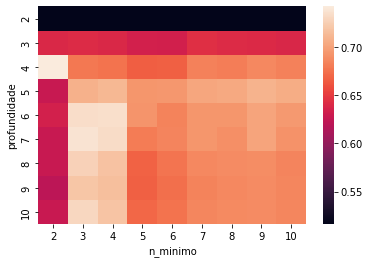

In [104]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 11):
    for j in range(2, 11):
        dt_reg = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        dt_reg.fit(X_train, y_train)
        mse1 = dt_reg.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [105]:
df_mse

,mses,profundidade,n_minimo
0,0.516666,2,2
1,0.516666,2,3
2,0.516666,2,4
3,0.516666,2,5
4,0.516666,2,6
...,...,...,...
76,0.675134,10,6
77,0.684796,10,7
78,0.686513,10,8
79,0.687837,10,9


In [106]:
from sklearn.metrics import mean_squared_error

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

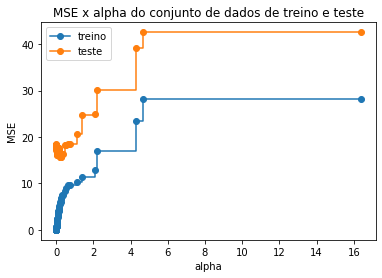

In [107]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Escolho o alpha: 0.061040

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [108]:
alpha = 0.061040
treeDt = DecisionTreeRegressor(random_state=444, ccp_alpha=alpha)
treeDt.fit(X_train, y_train)

print(treeDt.score(X_test, y_test))

mseResult = mean_squared_error(y_test, treeDt.predict(X_test))
print(f'MSE result to alpha = {alpha} tree is equal to {mseResult:.3f}')

0.79030077867309
MSE result to alpha = 0.06104 tree is equal to 16.950


### 7. Visualize esta árvore.

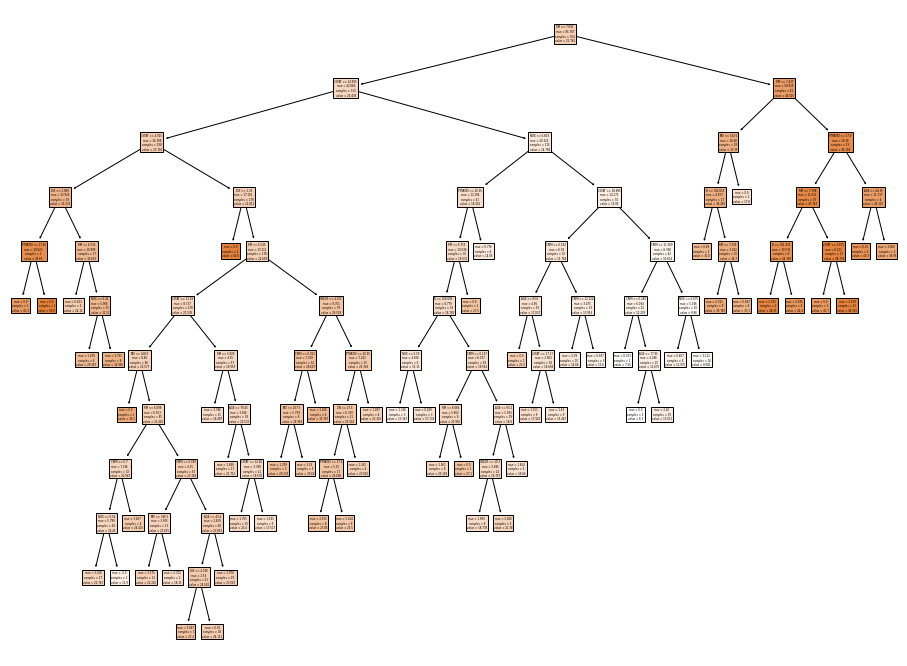

In [112]:
plt.figure(figsize=(16,12))

tr = tree.plot_tree(treeDt, filled=True, feature_names=X_train.columns)